In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms  # This will have necessary thing
import pandas as pd

In [ ]:
# SInce it is seasonal data it will not work well

In [2]:
df_airline=pd.read_csv('AirPassengers.csv')
df_airline.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
# check if there is any null value or not
df_airline.isnull().sum()

Month         0
Passengers    0
dtype: int64

In [4]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [5]:
# Convert the entire month into date time
df_airline['Month']=pd.to_datetime(df_airline['Month'])

In [6]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       144 non-null    datetime64[ns]
 1   Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [7]:
df_airline.head()

,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [8]:
# Set month column as index
df_airline.set_index('Month',inplace=True)

In [9]:
df_airline.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<Axes: xlabel='Month'>

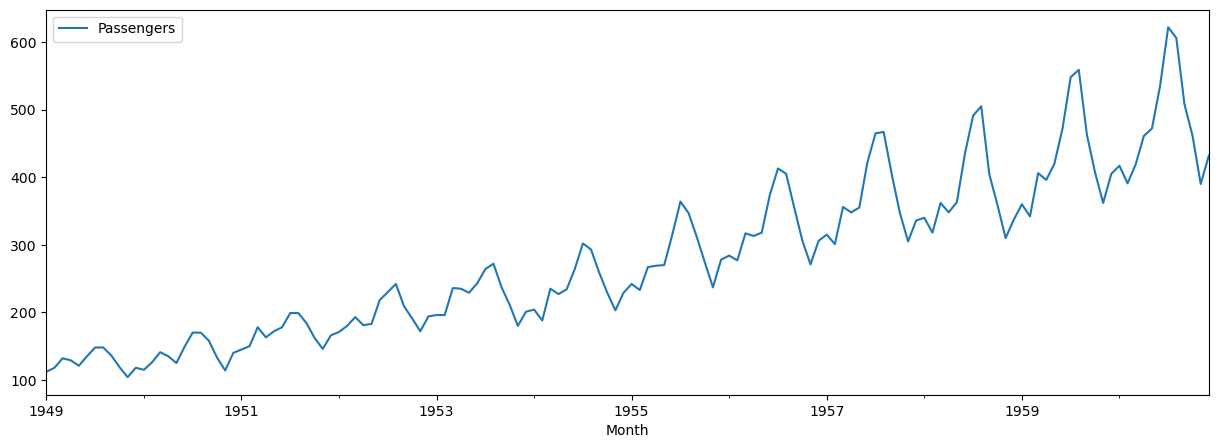

In [10]:
df_airline.plot(figsize=(15,5))
# Seasonal data , Not a stationary data, we have convert it into a stationary data

In [11]:
from statsmodels.tsa.stattools import adfuller

In [12]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics:{}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print('null will be rejected, Data is stationary')
    else:
        print('null will be accepted, Data is not stationary')
        

In [13]:
adf_test(df_airline['Passengers'])

ADF Statistics:0.8153688792060411
p-value: 0.9918802434376409
null will be accepted, Data is not stationary


In [14]:
# Convert the non stationary data into stationary data using differencing
df_airline['Passengers First Difference']=df_airline['Passengers']-df_airline['Passengers'].shift(1)
# Shift the value by 1 for differencing
# Differencing by one day

In [15]:
df_airline.tail()
#432 was deleted

,Passengers,Passengers First Difference
Month,,
1960-08-01,606,-16.0
1960-09-01,508,-98.0
1960-10-01,461,-47.0
1960-11-01,390,-71.0
1960-12-01,432,42.0


<Axes: xlabel='Month'>

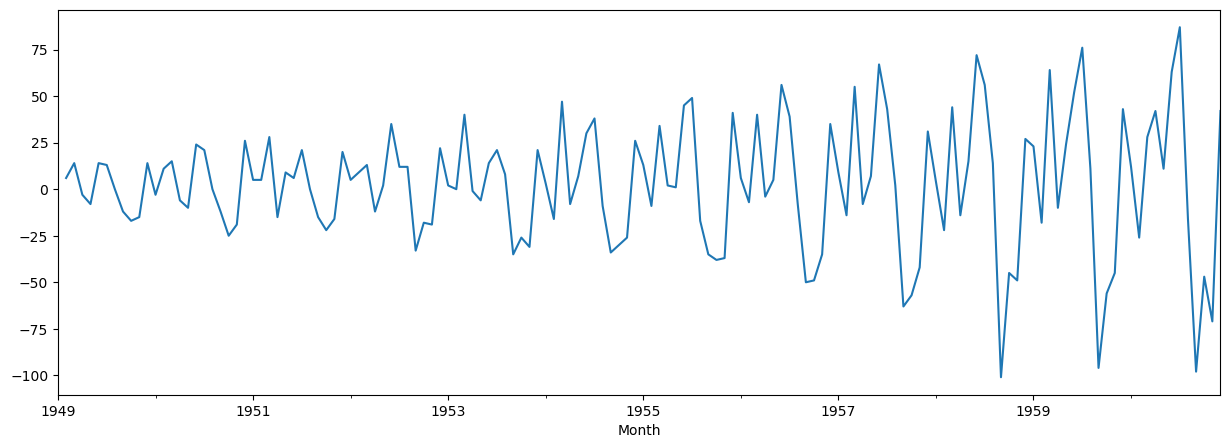

In [16]:
df_airline['Passengers First Difference'].plot(figsize=(15,5))

In [17]:
# Testing
adf_test(df_airline['Passengers First Difference'].dropna())

ADF Statistics:-2.8292668241699945
p-value: 0.05421329028382621
null will be accepted, Data is not stationary


In [18]:
# Second differencing
df_airline['Passengers Second Difference']=df_airline['Passengers First Difference']-df_airline['Passengers First Difference'].shift(1)
# 14-6

In [19]:
df_airline.head()

,Passengers,Passengers First Difference,Passengers Second Difference
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,6.0,NaN
1949-03-01,132,14.0,8.0
1949-04-01,129,-3.0,-17.0
1949-05-01,121,-8.0,-5.0


<Axes: xlabel='Month'>

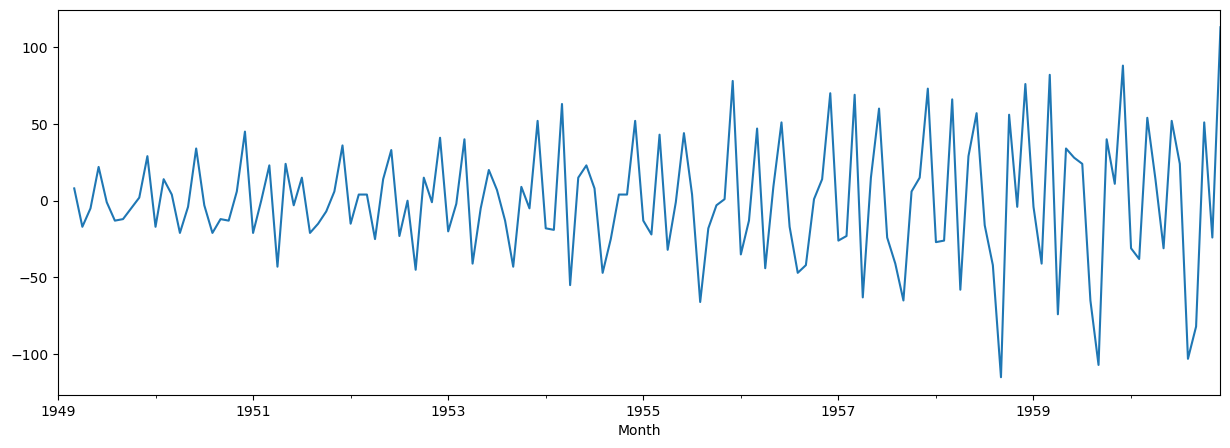

In [20]:
df_airline['Passengers Second Difference'].plot(figsize=(15,5))

In [21]:
adf_test(df_airline['Passengers Second Difference'].dropna())

ADF Statistics:-16.384231542468466
p-value: 2.732891850014397e-29
null will be rejected, Data is stationary


In [22]:
# In seasonal data, it is of 12 months,so shift 12 month
df_airline['12 month']=df_airline['Passengers']-df_airline['Passengers'].shift(12)

In [23]:
df_airline.head(14)

,Passengers,Passengers First Difference,Passengers Second Difference,12 month
Month,,,,
1949-01-01,112,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN
1949-03-01,132,14.0,8.0,NaN
1949-04-01,129,-3.0,-17.0,NaN
1949-05-01,121,-8.0,-5.0,NaN
1949-06-01,135,14.0,22.0,NaN
1949-07-01,148,13.0,-1.0,NaN
1949-08-01,148,0.0,-13.0,NaN
1949-09-01,136,-12.0,-12.0,NaN


<Axes: xlabel='Month'>

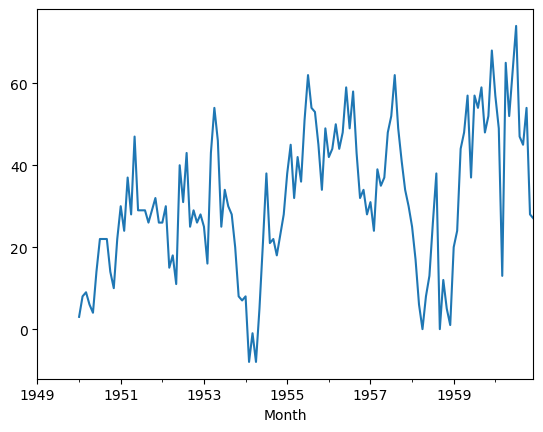

In [24]:
df_airline['12 month'].plot()

In [25]:
adf_test(df_airline['12 month'].dropna())
# Seasonal difference(12) we can apply
# For seasonal arimax may not work well , sarimax may work well

ADF Statistics:-3.3830207264924814
p-value: 0.011551493085514952
null will be rejected, Data is stationary


In [26]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
# Moving average :-ACF (Auto Correlation plot)
# Auto regressive model:-PACF (Partial auto correlation plot)
# SUDDEN shutdown

In [ ]:
# PACF= Indentification of AR model is best done on this
# FRom from where it is coming down, and then going in a zig zag format
# if this is not good then we will choose the second large value that is10,11,12, based on preferences
#p=1

In [ ]:
# ACF=Indentification of Moving Average model is best done on this
# FRom from where it is coming down, and then going in a zig zag format
# if this is not good then we will choose the second large value that is 11, based on preferences
# exponential decrease
#q=1

In [ ]:
# focus on 2 differencing graph
# In ACF(q)= 1
# In PACF(p)= 1

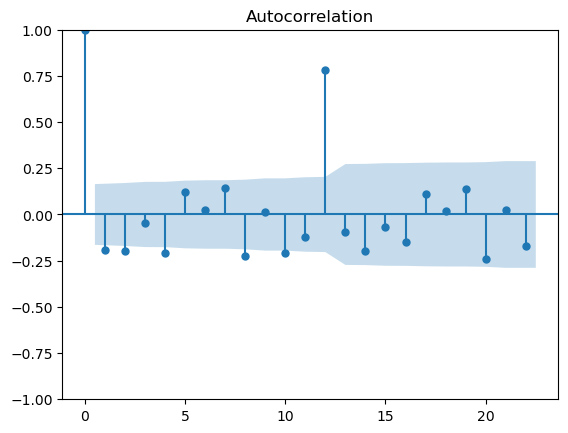

In [63]:
acf=plot_acf(df_airline['Passengers Second Difference'].dropna())


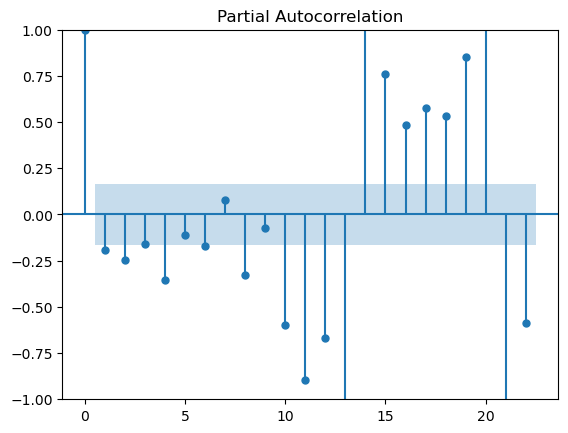

In [62]:
pacf=plot_pacf(df_airline['Passengers Second Difference'].dropna())

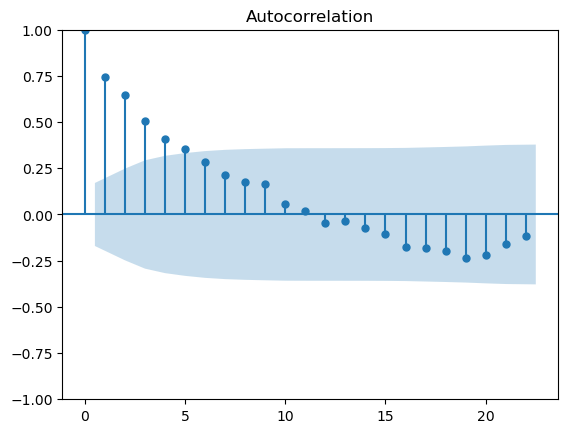

In [28]:
# for 12 month differencing
acf12=plot_acf(df_airline['12 month'].dropna())



C:\Users\HP\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


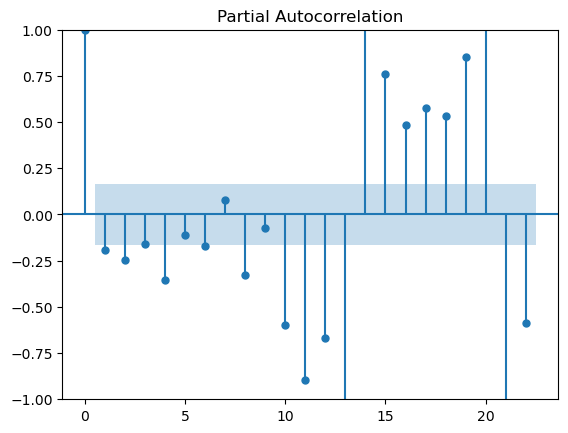

In [29]:
pacf=plot_pacf(df_airline['Passengers Second Difference'].dropna())


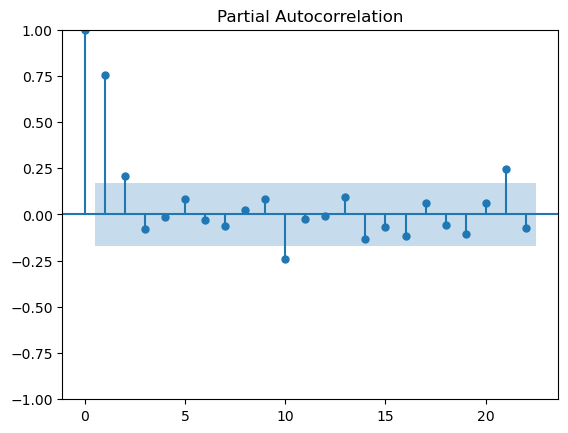

In [30]:
pacf12=plot_pacf(df_airline['12 month'].dropna())


In [31]:
# Create my train and test data
from datetime import datetime,timedelta
train_dataset_end=datetime(1955,12,1)
test_dataset_end=datetime(1960,12,1)

In [32]:
train_df=df_airline[:train_dataset_end]
test_df=df_airline[train_dataset_end+timedelta(days=1):test_dataset_end]

In [33]:
train_df.shape,test_df.shape

((84, 4), (60, 4))

In [34]:
train_df.head(84)

,Passengers,Passengers First Difference,Passengers Second Difference,12 month
Month,,,,
1949-01-01,112,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN
1949-03-01,132,14.0,8.0,NaN
1949-04-01,129,-3.0,-17.0,NaN
1949-05-01,121,-8.0,-5.0,NaN
...,...,...,...,...
1955-08-01,347,-17.0,-66.0,54.0
1955-09-01,312,-35.0,-18.0,53.0
1955-10-01,274,-38.0,-3.0,45.0


In [35]:
test_df.head(61)

,Passengers,Passengers First Difference,Passengers Second Difference,12 month
Month,,,,
1956-01-01,284,6.0,-35.0,42.0
1956-02-01,277,-7.0,-13.0,44.0
1956-03-01,317,40.0,47.0,50.0
1956-04-01,313,-4.0,-44.0,44.0
1956-05-01,318,5.0,9.0,48.0
1956-06-01,374,56.0,51.0,59.0
1956-07-01,413,39.0,-17.0,49.0
1956-08-01,405,-8.0,-47.0,58.0
1956-09-01,355,-50.0,-42.0,43.0


In [36]:
## Create a ARIMA Model
from statsmodels.tsa.arima.model import ARIMA

In [64]:
model_ARIMA=ARIMA(train_df['Passengers'],order=(1,2,1))


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [65]:
model_ARIMA=model_ARIMA.fit()

In [66]:
model_ARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Passengers   No. Observations:                   84
Model:                 ARIMA(1, 2, 1)   Log Likelihood                -367.837
Date:                Mon, 13 May 2024   AIC                            741.674
Time:                        18:24:22   BIC                            748.894
Sample:                    01-01-1949   HQIC                           744.572
                         - 12-01-1955                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2214      0.131      1.687      0.092      -0.036       0.479
ma.L1         -0.9996      6.398     -0.156      0.876     -13.539      11.540
sigma2       439.5004   2816.399      0.156      0.876   -5080.540    5959.541
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):                 3.05
Prob(Q):                              0.74   Prob(JB):                         0.22
Heteroskedasticity (H):               3.56   Skew:                             0.38
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [67]:
# Prediction
pred_start_date=test_df.index[0]
pred_end_date=test_df.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [68]:
pred=model_ARIMA.predict(start=pred_start_date,end=pred_end_date)
residual=test_df['Passengers']-pred
#residual=actual-predicted

In [69]:
residual

Month
1956-01-01     -4.750780
1956-02-01    -15.803091
1956-03-01     21.627926
1956-04-01     15.387415
1956-05-01     18.219642
1956-06-01     72.067976
1956-07-01    108.919877
1956-08-01     98.772568
1956-09-01     46.625433
1956-10-01     -4.521662
1956-11-01    -41.668749
1956-12-01     -8.815835
1957-01-01     -1.962919
1957-02-01    -18.110004
1957-03-01     34.742911
1957-04-01     24.595827
1957-05-01     29.448742
1957-06-01     94.301657
1957-07-01    135.154573
1957-08-01    135.007488
1957-09-01     69.860403
1957-10-01     10.713319
1957-11-01    -33.433766
1957-12-01     -4.580851
1958-01-01     -2.727935
1958-02-01    -26.875020
1958-03-01     14.977895
1958-04-01     -1.169189
1958-05-01     11.683726
1958-06-01     81.536641
1958-07-01    135.389557
1958-08-01    147.242472
1958-09-01     44.095387
1958-10-01     -3.051697
1958-11-01    -54.198782
1958-12-01    -29.345867
1959-01-01     -8.492951
1959-02-01    -28.640036
1959-03-01     33.212879
1959-04-01     21.0

<Axes: ylabel='Density'>

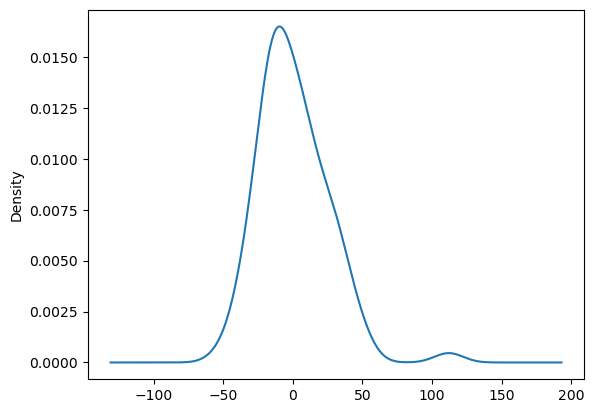

In [70]:
model_ARIMA.resid.plot(kind='kde')
# It looks like a distributed graph

In [71]:
# Saving the predicted value
test_df['Predicted_ARIMA']=pred

C:\Users\HP\AppData\Local\Temp\ipykernel_9972\3248461252.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['Predicted_ARIMA']=pred


<Axes: xlabel='Month'>

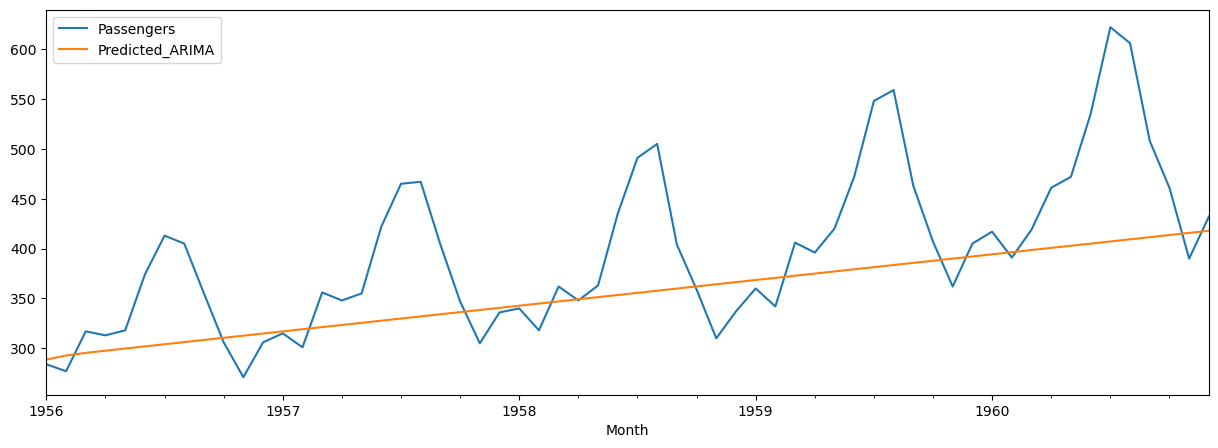

In [72]:
test_df[['Passengers','Predicted_ARIMA']].plot(figsize=(15,5))

In [46]:
## Create a SARIMAX Model
from statsmodels.tsa.statespace.sarimax import SARIMAX
# FOR Seasonal data

In [73]:
# For Passengers Second Difference
model_SARIMAX=SARIMAX(train_df['Passengers'],order=(1,2,1),seasonal_order=(1,1,1,12))


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [74]:
model_SARIMAX=model_SARIMAX.fit()

In [75]:
model_SARIMAX.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                         Passengers   No. Observations:                   84
Model:             SARIMAX(1, 2, 1)x(1, 1, 1, 12)   Log Likelihood                -261.674
Date:                            Mon, 13 May 2024   AIC                            533.348
Time:                                    18:25:02   BIC                            544.590
Sample:                                01-01-1949   HQIC                           537.813
                                     - 12-01-1955                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2323      0.118     -1.967      0.049      -0.464      -0.001
ma.L1         -0.9999     20.908     -0.048      0.962     -41.978      39.979
ar.S.L12      -0.2810      0.541     -0.519      0.604      -1.342       0.780
ma.S.L12       0.0337      0.617      0.055      0.957      -1.176       1.243
sigma2        95.0782   1984.800      0.048      0.962   -3795.058    3985.215
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 2.93
Prob(Q):                              0.94   Prob(JB):                         0.23
Heteroskedasticity (H):               2.62   Skew:                             0.47
Prob(H) (two-sided):                  0.02   Kurtosis:                         2.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [76]:
# Prediction
pred_start_date=test_df.index[0]
pred_end_date=test_df.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [77]:
pred_SARIMAX=model_SARIMAX.predict(start=datetime(1960,6,6),end=datetime(1960,12,1))
residual=test_df['Passengers']-pred_SARIMAX

<Axes: ylabel='Density'>

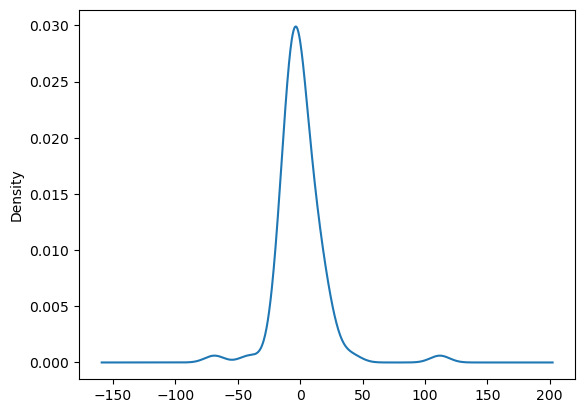

In [78]:
model_SARIMAX.resid.plot(kind='kde')

In [79]:
# Saving the predicted value
test_df['Predicted_SARIMA']=pred

C:\Users\HP\AppData\Local\Temp\ipykernel_9972\2680448357.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['Predicted_SARIMA']=pred


<Axes: xlabel='Month'>

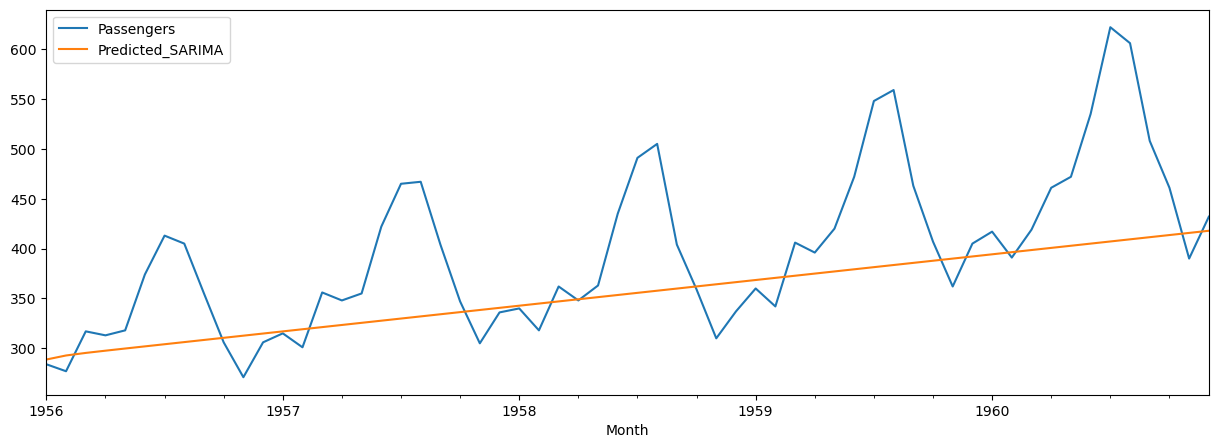

In [80]:
test_df[['Passengers','Predicted_SARIMA']].plot(figsize=(15,5))

<Axes: xlabel='Month'>

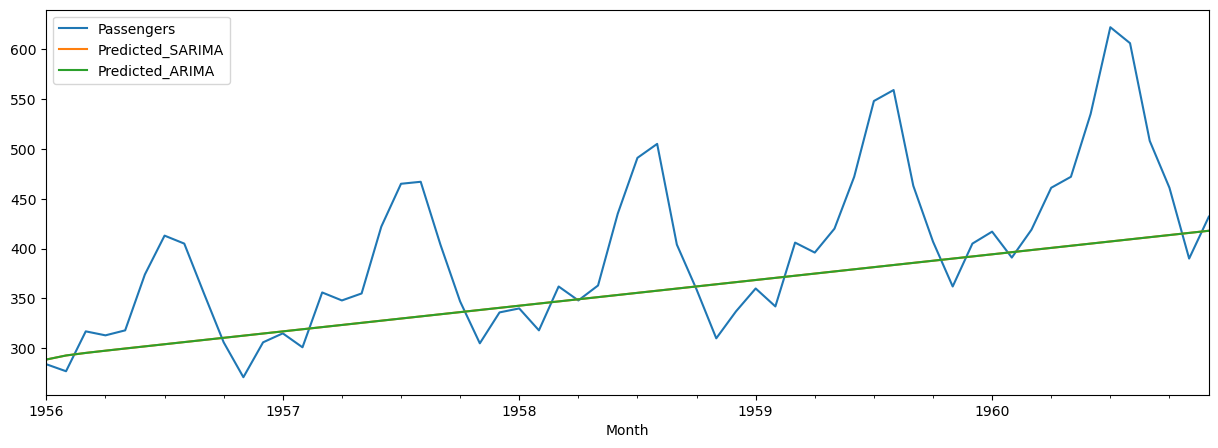

In [81]:
test_df[['Passengers','Predicted_SARIMA','Predicted_ARIMA']].plot(figsize=(15,5))